# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Roman P. 6532
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Help understanding the assignment flow and get small code examples for specific parts.
Propmpt1: how to build a basic classification pipeline in sklearn with both numeric and categorical features?
    
Propmpt2: what are common eda plots to show for the titanic dataset and how do I make them with seaborn or matplotlib?
    
Propmpt3: how can i summarize cross-validation results from GridSearchCV in a comparison table using pandas?


AI agent name 2: did not use
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse: Just used VS Code with Anaconda. Fixed things step by step after getting help from ChatGPT and checked that it works.
   
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this project I used the Titanic dataset which is a classic classification problem. The goal is to predict if a passenger survived or not based on features like age, sex, class, number of siblings, and other things. The dataset is from Kaggle and already divided into train and test. It contains missing values and some categorical features that needs to be prepared before training. The target variable is called "Survived" and 
it's binary (0 or 1). I chose this dataset because it is simple and good for practicing supervised learning methods with pipelines and cross validation.
</pre>


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

print("Train set:")
print(train_df.head())

print("\nTest set:")
print(test_df.head())


features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X_test = test_df[features]



Train set:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test set:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [33]:

print("Train info:")
print(train_df.info())

print("\nMissing values in train set:")
print(train_df.isnull().sum())

print("\nTest info:")
print(test_df.info())

print("\nMissing values in test set:")
print(test_df.isnull().sum())


Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
None

Missing values in train set:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age   

In [34]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

print("Missing values after cleaning (train):")
print(train_df.isnull().sum())
print("\nMissing values after cleaning (test):")
print(test_df.isnull().sum())


Missing values after cleaning (train):
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Missing values after cleaning (test):
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


C:\Users\rpiln\AppData\Local\Temp\ipykernel_6196\665025256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\rpiln\AppData\Local\Temp\ipykernel_6196\665025256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

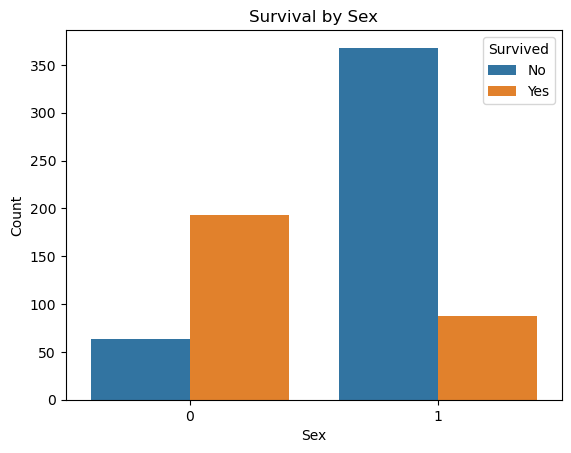

In [35]:
sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


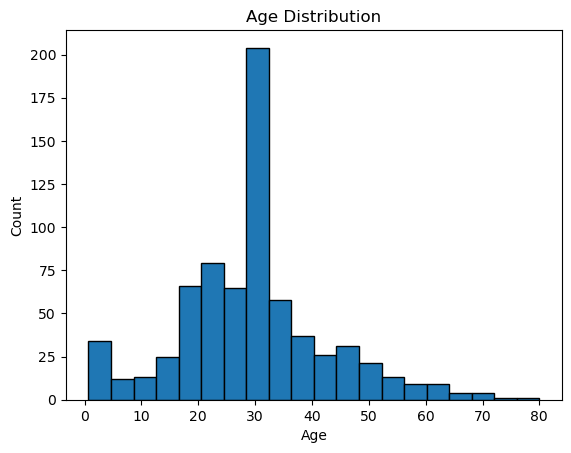

In [36]:
plt.hist(train_df["Age"], bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


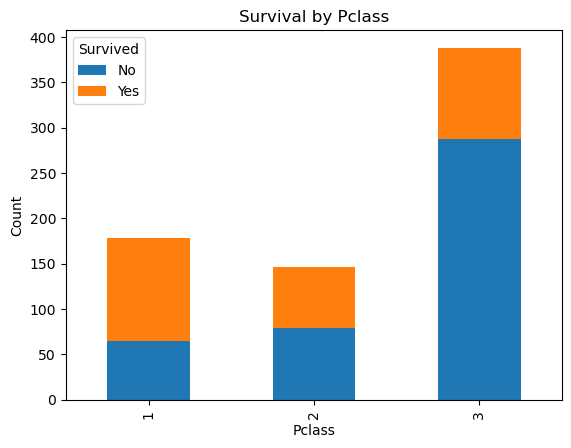

In [37]:
pclass_survived = pd.crosstab(train_df["Pclass"], train_df["Survived"])
pclass_survived.plot(kind="bar", stacked=True)
plt.title("Survival by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [38]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = StandardScaler()

categorical_features = ["Pclass", "Sex", "Embarked"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

param_grid_logreg = {
    "classifier__C": [0.1, 1, 10],
    "classifier__penalty": ["l2"]
}

scorer = make_scorer(f1_score)

grid_logreg = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid_logreg,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)

grid_logreg.fit(X, y)

print("Best score (LogReg):", grid_logreg.best_score_)
print("Best params:", grid_logreg.best_params_)


Best score (LogReg): 0.739164726327055
Best params: {'classifier__C': 1, 'classifier__penalty': 'l2'}


In [41]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

param_grid_rf = {
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": [3, 5, None]
}

grid_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring=scorer,
    n_jobs=-1
)

grid_rf.fit(X, y)

print("Best score (Random Forest):", grid_rf.best_score_)
print("Best params:", grid_rf.best_params_)


Best score (Random Forest): 0.7538939975663013
Best params: {'classifier__max_depth': None, 'classifier__n_estimators': 50}


In [42]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Best F1 Score": [grid_logreg.best_score_, grid_rf.best_score_],
    "Best Params": [grid_logreg.best_params_, grid_rf.best_params_]
})

print(results)


                 Model  Best F1 Score  \
0  Logistic Regression       0.739165   
1        Random Forest       0.753894   

                                         Best Params  
0  {'classifier__C': 1, 'classifier__penalty': 'l2'}  
1  {'classifier__max_depth': None, 'classifier__n...  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [43]:
best_rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=grid_rf.best_params_["classifier__n_estimators"],
        max_depth=grid_rf.best_params_["classifier__max_depth"]
    ))
])

best_rf_pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

## Part 5 - Apply on test and show model performance estimation

In [ ]:
X_test = test_df[features]

test_preds = best_rf_pipeline.predict(X_test)

print("First 5 predictions:")
print(test_preds[:5])


First 5 predictions:
[0 0 0 1 1]
